PPCA lavora con più variabili osservabili anzichè una sola

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import aesara.tensor as at
import arviz as az
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from scipy import stats
import scipy
import pandas as pd

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
scaler = StandardScaler()

# extract data social anxiety

In [3]:
csv_ = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive/behavior/LookAtMe_045.csv'
csv_ = '/home/paolo/matteo/matteo/unimi/tesi_master/code/osfstorage-archive/behavior/LookAtMe_045.csv'
global_data = pd.read_csv(csv_, sep='\t')
y = np.array(list([int(d>2) for d in global_data['rating']]))
e_labels = y[:,np.newaxis]  # rating > 2

In [4]:
print(len(e_labels))

160


In [5]:
N_e = e_labels.shape[0]
D_e = e_labels.shape[1]
print(N_e,D_e)

160 1


## test with new data

In [6]:
from deepemogp import feature_extractor
from deepemogp.signal import physio as physio
from deepemogp import datasets as datasets
from deepemogp.signal import behavior as behavior
from deepemogp.signal.physio import ecg
# from: https://github.com/SheffieldML/GPy
#import GPy
# from: https://github.com/SheffieldML/PyDeepGP
#import deepgp

import pandas as pd
import numpy as np

show = False
# definition of the feature extractors to be used later
f2 = feature_extractor.FE('wavelet', window=(2, 1))
f3 = feature_extractor.FE('mean', window=(1,0))

# definition of the physiological signals to be extracted
eda_ = physio.EDA(f3)
hr_ = physio.HR(f3)
pupil_ = behavior.PUPIL(f3)

# definition of the emotional annotation to be extracted
#va = annotation.VA('valence', f3)
#ar = annotation.VA('arousal', f3)
# extraction of the desired data from the dataset
d = datasets.FEAR(signals={hr_,pupil_,eda_}, subjects={'45'})

for s in d.signals:
    # preprocess ...
    if s.name =='EDA':
        s.preprocess(show=show,new_fps=500)
        s.feature_ext.extract_feat(s,show=show)
    else:
        if s.name == 'HR':
            list_hr_test = s.raw[0]['data']
            s.preprocess(show=show, useneurokit=True)
            s.feature_ext.extract_feat(s,show=show)

        else:
            s.feature_ext.extract_feat_without_preprocess(s, show=show)

    #add feature extraction for eda before preprocessing

    # ... and extract features from each signal type


for sig in d.signals:
    if sig.name=='EDA':
        eda_data = sig.features
    if sig.name=='HR':
        hr_data = sig.features
    if sig.name=='PUPIL':
        pupil_data = sig.features

>> Loading EDA for subject 45 and all sessions from dataset FEAR
>> Loading HR for subject 45 and all sessions from dataset FEAR
>> Loading PUPIL for subject 45 and all sessions from dataset FEAR
>> Processing EDA ...
>> Extracting mean features from EDA signal, adopting (1, 0) window ...
>> Processing HR ... using neurokit


/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/neurokit2/epochs/epochs_create.py:205: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, column in epochs[i].select_dtypes(include=["object"]).iteritems():
/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/neurokit2/epochs/epochs_create.py:205: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, column in epochs[i].select_dtypes(include=["object"]).iteritems():
/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/neurokit2/epochs/epochs_create.py:205: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname, column in epochs[i].select_dtypes(include=["object"]).iteritems():
/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/n

>> Extracting mean features from HR signal, adopting (1, 0) window ...
>> Extracting mean features from PUPIL signal, adopting (1, 0) window ...


In [7]:
list(d.signals)[1].name

'HR'

In [8]:
list(d.signals)[1].processed[159]['data']

0       136.054422
1       136.054422
2       136.054422
3       136.054422
4       136.054422
           ...    
2995    127.388535
2996    127.388535
2997    127.388535
2998    127.388535
2999    127.388535
Name: ECG_Rate, Length: 3000, dtype: float64

In [9]:
np.array(eda_data)

array([[ 4.10397171e-03],
       [ 1.59308697e+00],
       [ 3.12601601e+00],
       [ 2.53156847e+00],
       [ 1.70273393e+00],
       [ 1.16606095e+00],
       [-1.15954169e-01],
       [ 2.78734666e-01],
       [ 2.48994958e+00],
       [ 2.91605566e+00],
       [ 2.18922809e+00],
       [ 1.51359518e+00],
       [ 4.86884585e-01],
       [ 1.24099659e+00],
       [ 3.01323950e+00],
       [ 3.29895682e+00],
       [ 2.38063467e+00],
       [ 1.69543273e+00],
       [ 8.09223482e-02],
       [ 1.61763163e+00],
       [ 3.43861373e+00],
       [ 2.83945669e+00],
       [ 2.15119420e+00],
       [ 2.70483485e+00],
       [ 6.51523295e-02],
       [ 1.79681631e+00],
       [ 3.35208096e+00],
       [ 2.70601661e+00],
       [ 1.92795911e+00],
       [ 1.68720302e+00],
       [-1.43585797e-02],
       [ 9.47480777e-01],
       [ 3.16332377e+00],
       [ 2.99517557e+00],
       [ 2.12954743e+00],
       [ 1.68940863e+00],
       [ 8.80447676e-01],
       [ 1.93013010e+00],
       [ 5.2

In [10]:
np.array(hr_data)

array([[133.2741004 ],
       [139.12481219],
       [131.20154558],
       [122.42738037],
       [139.33028877],
       [139.2789793 ],
       [138.05798435],
       [137.65789703],
       [128.89195612],
       [137.56666602],
       [152.76538237],
       [136.56534909],
       [137.23671541],
       [136.54542844],
       [130.21415679],
       [143.38061006],
       [145.01499296],
       [131.8131224 ],
       [140.61746764],
       [144.78348811],
       [131.52662236],
       [142.86544436],
       [148.50552698],
       [133.30922515],
       [145.47411312],
       [148.60623191],
       [145.33403468],
       [135.86184763],
       [153.66336839],
       [146.54247826],
       [144.43909485],
       [147.100225  ],
       [146.93629161],
       [137.13287558],
       [139.35506518],
       [151.23410359],
       [130.15184382],
       [130.20944325],
       [131.6189088 ],
       [132.15449365],
       [126.23408917],
       [129.71726275],
       [136.2229583 ],
       [139

In [11]:
np.array(pupil_data)

array([[2.45239393],
       [2.66638125],
       [2.59187033],
       [2.4506036 ],
       [2.80837978],
       [2.59338696],
       [2.55991296],
       [2.53492629],
       [2.48206472],
       [2.62299583],
       [2.51776189],
       [2.52536855],
       [2.71710262],
       [2.85383682],
       [2.64254111],
       [2.59916026],
       [2.78052864],
       [2.66078013],
       [2.80587036],
       [2.90862783],
       [2.66953859],
       [2.56049477],
       [2.37752592],
       [2.4753718 ],
       [2.82322928],
       [2.69363716],
       [2.60489613],
       [2.52116537],
       [2.56927633],
       [2.71404879],
       [2.53859531],
       [2.63078144],
       [3.00423614],
       [2.67140556],
       [2.65304165],
       [2.45419989],
       [2.29169615],
       [2.40401754],
       [2.40156297],
       [2.46497346],
       [2.7961956 ],
       [2.60416088],
       [2.46037891],
       [2.54203925],
       [2.48787623],
       [2.46366409],
       [2.67486512],
       [2.658

In [12]:
TRIAL = 160

In [13]:
hr =np.array(hr_data)
hr = hr.reshape((TRIAL, int(hr.shape[0]/TRIAL*hr.shape[1])))
hr

array([[133.2741004 , 139.12481219, 131.20154558, 122.42738037,
        139.33028877, 139.2789793 ],
       [138.05798435, 137.65789703, 128.89195612, 137.56666602,
        152.76538237, 136.56534909],
       [137.23671541, 136.54542844, 130.21415679, 143.38061006,
        145.01499296, 131.8131224 ],
       [140.61746764, 144.78348811, 131.52662236, 142.86544436,
        148.50552698, 133.30922515],
       [145.47411312, 148.60623191, 145.33403468, 135.86184763,
        153.66336839, 146.54247826],
       [144.43909485, 147.100225  , 146.93629161, 137.13287558,
        139.35506518, 151.23410359],
       [130.15184382, 130.20944325, 131.6189088 , 132.15449365,
        126.23408917, 129.71726275],
       [136.2229583 , 139.92781223, 143.1090565 , 146.98839723,
        125.24596662, 120.04449434],
       [131.5212626 , 132.46583809, 138.10301422, 131.953204  ,
        123.65365443, 132.05574136],
       [134.64991023, 141.64972826, 139.04618297, 122.88825288,
        123.99495412, 147.0

In [14]:
pupil = np.array(pupil_data)
pupil = pupil.reshape((TRIAL, int(pupil.shape[0]/TRIAL*pupil.shape[1])))
pupil

array([[2.45239393, 2.66638125, 2.59187033, 2.4506036 , 2.80837978],
       [2.59338696, 2.55991296, 2.53492629, 2.48206472, 2.62299583],
       [2.51776189, 2.52536855, 2.71710262, 2.85383682, 2.64254111],
       [2.59916026, 2.78052864, 2.66078013, 2.80587036, 2.90862783],
       [2.66953859, 2.56049477, 2.37752592, 2.4753718 , 2.82322928],
       [2.69363716, 2.60489613, 2.52116537, 2.56927633, 2.71404879],
       [2.53859531, 2.63078144, 3.00423614, 2.67140556, 2.65304165],
       [2.45419989, 2.29169615, 2.40401754, 2.40156297, 2.46497346],
       [2.7961956 , 2.60416088, 2.46037891, 2.54203925, 2.48787623],
       [2.46366409, 2.67486512, 2.65886801, 2.5452179 , 2.69123385],
       [2.35282239, 2.51053252, 2.47818746, 2.61634768, 2.34638445],
       [2.69495718, 2.91349163, 3.06015049, 2.77073565, 2.72773236],
       [2.53074146, 2.42715984, 2.60548436, 2.70087583, 2.3135078 ],
       [2.55345281, 2.62065232, 2.58789636, 2.644122  , 2.72449498],
       [2.45065309, 2.5222609 , 2.

In [15]:
eda = np.array(eda_data)
eda = eda.reshape((TRIAL,int(eda.shape[0]/TRIAL*eda.shape[1])))
eda

array([[ 4.10397171e-03,  1.59308697e+00,  3.12601601e+00,
         2.53156847e+00,  1.70273393e+00,  1.16606095e+00],
       [-1.15954169e-01,  2.78734666e-01,  2.48994958e+00,
         2.91605566e+00,  2.18922809e+00,  1.51359518e+00],
       [ 4.86884585e-01,  1.24099659e+00,  3.01323950e+00,
         3.29895682e+00,  2.38063467e+00,  1.69543273e+00],
       [ 8.09223482e-02,  1.61763163e+00,  3.43861373e+00,
         2.83945669e+00,  2.15119420e+00,  2.70483485e+00],
       [ 6.51523295e-02,  1.79681631e+00,  3.35208096e+00,
         2.70601661e+00,  1.92795911e+00,  1.68720302e+00],
       [-1.43585797e-02,  9.47480777e-01,  3.16332377e+00,
         2.99517557e+00,  2.12954743e+00,  1.68940863e+00],
       [ 8.80447676e-01,  1.93013010e+00,  5.28593958e+00,
         5.73244736e+00,  5.38502407e+00,  6.45775903e+00],
       [ 3.58091698e-01,  4.44444779e-01,  3.33006747e-01,
         1.30441359e+00,  4.10941315e+00,  3.94135521e+00],
       [ 2.54400106e-01,  2.74968527e-01,  6.951

## end test

prendo un'implementazione di sppca e la applico al nostro caso

different types of observable data

1) gaze
2) fisio
    2.1) heart rate variability
    2.2) eda phasic value
3) social anxiety
4) aspettativa del dolore

In [16]:

'''social_anx = data['social anxiety'][:,np.newaxis]
pain_exp = data['pain expectation'][:,np.newaxis]'''


"social_anx = data['social anxiety'][:,np.newaxis]\npain_exp = data['pain expectation'][:,np.newaxis]"

In [17]:
print(pupil.shape)
print(hr.shape)
print(eda.shape)

(160, 5)
(160, 6)
(160, 6)


In [18]:
N_pupil = pupil.shape[0]
D_pupil = pupil.shape[1]

N_hr = hr.shape[0]
D_hr = hr.shape[1]

N_eda = eda.shape[0]
D_eda = eda.shape[1]
K = 3

print(N_pupil,D_pupil)
print(N_hr,D_hr)
print(N_eda,D_eda)
print(N_e, D_e)

160 5
160 6
160 6
160 1


In [40]:
with pm.Model() as sPPCA:
    #dati osservabili
    hr_data = pm.MutableData("hr_data", hr.T)
    pupil_data = pm.MutableData("pupil_data", pupil.T)
    eda_data = pm.MutableData("eda_data", eda.T)

    e_data = pm.ConstantData("e_data", e_labels.T)

    #matrici pesi
    Whr = pm.Normal('Whr', mu=at.zeros([D_hr, K]), sigma=2.0 * at.ones([D_hr, K]), shape=[D_hr, K])
    Wpupil = pm.Normal('Wpupil', mu=at.zeros([D_pupil, K]), sigma=2.0 * at.ones([D_pupil, K]), shape=[D_pupil, K])

    Weda = pm.Normal('Weda', mu=at.zeros([D_eda, K]), sigma=2.0 * at.ones([D_eda, K]), shape=[D_eda, K])

    #weight matrix for pain expectation.
    #check mu,sigma,shape
    We = pm.Normal('W_e', mu=at.zeros([D_e, K]), sigma=2.0 * at.ones([D_e,K]), shape=[D_e, K])

    #latent space
    c = pm.Normal('c', mu=at.zeros([N_hr,K]), sigma=at.ones([N_hr,K]), shape=[N_hr,K])

    county = [1,2,3,4]
    subject_idx = 2

    county_idx = pm.Data("subject_idx", county, dims="obs_id")

    # dati dell'hrv interpretati come una gaussiana
    a_hr = pm.Normal('mu_hr', Whr.dot(c.T), 10) # hyperprior 1
    sigma_hr = pm.Exponential('sigma_hr', 1)# hyperprior 2
    a_subjects= pm.Normal("a_subjects",mu=a_hr, sigma=sigma_hr) #dims=[D_hr,N_hr]
    theta = a_subjects[subject_idx]
    sigma2_hr = pm.Exponential("sigma2_hr",1.0)
    x_hr = pm.Normal('x_hr', mu=theta, sigma=sigma2_hr ,shape=[D_hr, N_hr], observed=hr_data)


    # dati della dilatazione pupille interpretati come una gaussiana
    mu_pupil = pm.Normal('mu_pupil', Wpupil.dot(c.T), at.ones([D_pupil,N_pupil])) # hyperprior 1
    sigma_pupil = pm.Exponential('sigma_pupil', at.ones([D_pupil,N_pupil]))# hyperprior 2
    x_pupil = pm.Normal('x_pupil', mu=mu_pupil, sigma=sigma_pupil, shape=[D_pupil, N_pupil], observed=pupil_data)

    #eda
    mu_eda = pm.Normal('mu_eda', Weda.dot(c.T), at.ones([D_eda,N_eda])) # hyperprior 1
    sigma_eda = pm.Exponential('sigma_eda', at.ones([D_eda,N_eda])) # hyperprior 2
    x_eda = pm.Normal('x_eda', mu=mu_eda, sigma=sigma_eda, shape=[D_eda,N_eda], observed=eda_data)

    # pain expectation. ciò che dovremmo inferire dato c
    # due strade: binary o multiclass (1-4)
    # p = probability of success?
    x_e = pm.Bernoulli('x_e' , p=pm.math.sigmoid(We.dot(c.T)) , shape =[D_e, N_e], observed=e_data)

    #x_hr = pm.Bernoulli('x_hr', p=pm.math.sigmoid(Whr.dot(c.T)), shape=[D_hr, N_hr], observed=hr_data)
    #x_eda = pm.Bernoulli('x_eda', p=pm.math.sigmoid(Weda.dot(c.T)), shape=[D_eda, N_eda], observed=eda_data)

/home/paolo/matteo/matteo/unimi/tesi_master/code/my_env/lib/python3.8/site-packages/pymc/data.py:676: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


In [41]:
gv = pm.model_to_graphviz(sPPCA)
gv.view()

'.gv.pdf'

In [21]:
sPPCA.free_RVs

[Whr ~ N(f(), f()),
 Wpupil ~ N(f(), f()),
 Weda ~ N(f(), f()),
 W_e ~ N(f(), f()),
 c ~ N(f(), f()),
 mu_hr ~ N(f(Whr, c), f()),
 sigma_hr ~ Exp(f()),
 mu_pupil ~ N(f(Wpupil, c), f()),
 sigma_pupil ~ Exp(f()),
 mu_eda ~ N(f(Weda, c), f()),
 sigma_eda ~ Exp(f())]

In [22]:
with sPPCA:
    approx = pm.fit(100000, callbacks=[pm.callbacks.CheckParametersConvergence(tolerance=1e-4)])
    trace = approx.sample(500)

'''with sPPCA:
    trace = pm.sample(1000,init='advi+adapt_diag',chains=1,target_accept=0.95)'''

qt5ct: using qt5ct plugin
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/16/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/16@2x/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/16/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/16@2x/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/22/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/22@2x/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/24/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/24@2x/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/24/"
Invalid Context= "Mimetypes" line for icon theme:  "/usr/share/icons/Mint-Y/mimetypes/24@2x/"
Invalid Context= "Apps" line for icon theme:  "/usr/share/icons/Mint-Y/apps/32/"
Invalid Context= "Apps" line

Finished [100%]: Average Loss = 44,587


"with sPPCA:\n    trace = pm.sample(1000,init='advi+adapt_diag',chains=1,target_accept=0.95)"

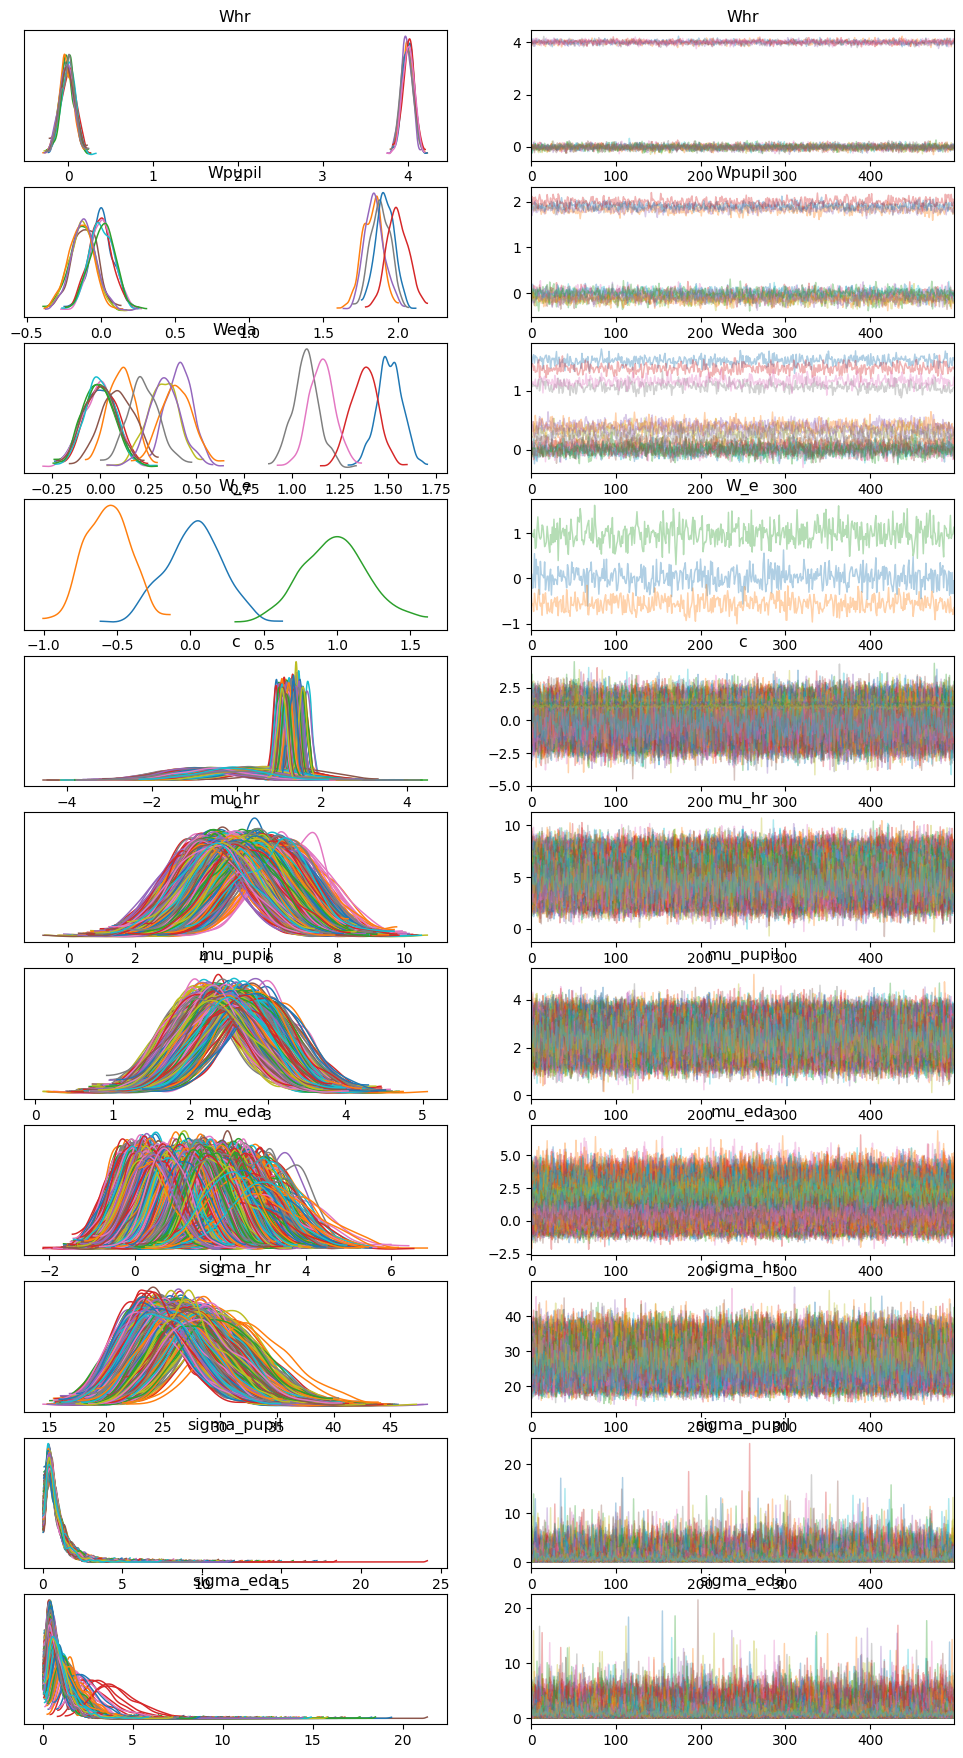

In [23]:
#az.plot_posterior(mean_field.sample(1000), color="LightSeaGreen")
az.plot_trace(trace)
plt.show()

In [24]:
with sPPCA:
    # update values of predictors:
    pm.set_data({"pupil_data": pupil,"hr_data":hr,"eda_data":eda})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, random_seed=123)

Sampling: [x_e, x_eda, x_hr, x_pupil]


In [25]:
e_pred = posterior_predictive.posterior_predictive["x_e"]

In [26]:
e_pred_mode = np.squeeze(stats.mode(e_pred[0], keepdims=False)[0])[:,np.newaxis]

In [27]:
e_pred_mode

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [28]:
e_labels

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [29]:
train_accuracy_exp = accuracy_score(e_labels, e_pred_mode)
print('\n\tTrain Accuracy Pain Expectation: ' + str(train_accuracy_exp))
print(' ')


	Train Accuracy Pain Expectation: 0.71875
 


--------------------------------------------------------------------------------------------

In [30]:
hr_pred_mean = (stats.median_abs_deviation(hr_pred[0]))[0]
hr_pred_mean

NameError: name 'hr_pred' is not defined

In [ ]:
hr[0]

In [ ]:
#hr_pred_mode= pd.Series([0.006,0.01,0.02,0.003])

hr and hr_pred_mode devono avere same shape

In [ ]:
train_accuracy_hr = (np.subtract(hr[0], hr_pred_mean))
print('\n\t avg distance hr: \n' + str(train_accuracy_hr))
#print(' ')

In [ ]:
with sPPCA:
    # update values of predictors:
    pm.set_data({"hr_data": hr})
    # use the updated values and predict outcomes and probabilities:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, random_seed=123)
    gaze_pred = posterior_predictive.posterior_predictive["x_gaze"]

In [ ]:
gaze_pred

In [ ]:
gaze_pred_mean = np.mean(gaze_pred, axis=0).T.reshape(-1)
gaze_true = pupil.reshape(-1)
reconstructed_r2 = metrics.r2_score(gaze_true, gaze_pred_mean)

print('\n\tReconstructed X R2 score: ' + str(reconstructed_r2))

In [ ]:
import deepemogp.feature_extractor as feature_extractor

In [ ]:
f = feature_extractor.FE('wavelet', window=(8,6), params={'w_mother':'db3','w_maxlev':1})

In [ ]:
x = [3, 7, 1, 1, -2, 5, 4, 6]

In [ ]:
f.apply(x)